# 5.2. Zbiór danych: spłata karty kredytowej

W tym rozdziale będziemy pracować na zbiorze danych dotyczących spłat kart kredytowych. Zbiór ten zawiera informację o historii spłat dla danych osób oraz kilka szczegółów społeczno-demograficznych. Rzućmy okiem na sam zbiór, lecz tym razem sprawdźmy najpierw jak wygląda źródłowy plik.

![](images/credit-cards-screenshot.png)

In [1]:
import pandas as pd

In [2]:
credit_cards_df = pd.read_excel(
    "../data/credit-cards/default-of-credit-card-clients.xls",
    index_col=0, skiprows=1
)
credit_cards_df.sample(n=5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
9085,50000,2,1,2,27,2,2,2,2,2,...,48542,49630,50047,2000,2000,2000,2000,1700,2000,1
21925,110000,2,2,1,26,0,0,0,0,0,...,87049,66820,65823,3500,3500,3000,2342,2390,3000,0
26599,160000,1,1,2,25,1,-1,2,2,-2,...,0,0,0,10139,0,0,0,0,0,1
2557,200000,1,1,2,28,-1,-1,-1,-1,-1,...,527,4524,5522,10712,1194,527,4537,5538,3883,0
22450,120000,2,2,1,41,-1,-1,-1,-1,0,...,21455,15685,6737,0,28466,21455,0,0,200,0


In [3]:
credit_cards_df.sample(n=5).T

ID,18397,7428,15184,19445,2328
LIMIT_BAL,20000,150000,80000,30000,50000
SEX,2,1,2,2,2
EDUCATION,1,1,2,3,2
MARRIAGE,2,2,2,2,2
AGE,24,32,25,23,41
PAY_0,-2,0,0,1,0
PAY_2,2,0,0,2,0
PAY_3,2,2,0,0,0
PAY_4,2,2,0,0,-2
PAY_5,2,2,0,0,-2


Kolumną oznaczającą problem ze spłatą jest ostatnia z nich. Wartość $ 1 $ w tym polu oznacza, że dana osoba miała problem ze spłatą karty w terminie, a $ 0 $ sytuację przeciwną. W finansach określeniem *default* określa się niewypłacalność klienta.

Ponadto w zbiorze mamy też następujące cechy:

- **LIMIT_BAL** - przydzielony limit na karcie kredytowej
- **SEX** - płeć (1 = mężczyzna, 2 = kobieta)
- **EDUCATION** - wykształcenie, wartość od 1 do 6 (1 = wyższe pełne, 2 = wyższe (1. stopień), 3 = średnie, 4 = inne, 5 i 6 = nieznane)
- **MARRIAGE** - stan cywilny (1 = zamężna/żonaty, 2 = panna/kawaler, 3 = inny)
- **AGE** - wiek w latach
- **PAY_0 - PAY_6** - status spłaty w poprzednich miesiącach  (-2 = brak korzystania z karty, -1 = spłata w terminie, 0 = skorzystanie z kredytu odnawialnego, 1 = płatnośc opóźniona o 1 miesiąc, ...,  9 = płatność opóźniona o 9 bądź więcej miesięcy)
- **BILL_AMT1 - BILL_AMT6** - kwota na wyciągu z rachunku w poprzednich miesiącach
- **PAY_AMT1 - PAY_AMT6** - sumy spłat w poprzednich miesiącach

## Poprawienie zbioru danych

Z jakiegoś powodu zmienna PAY_0 odstaje od konwencji, podobnie jak zmienna, którą będziemy chcieli modelować. Zmienimy więc ich nazwy, żeby cały zbiór był spójny.

In [4]:
credit_cards_df.rename(columns={"PAY_0": "PAY_1", 
                                "default payment next month": "DEFAULT"}, 
                       inplace=True)
credit_cards_df.sample(n=5).T

ID,8821,22120,9814,13321,15674
LIMIT_BAL,60000,430000,100000,50000,200000
SEX,2,2,2,2,1
EDUCATION,1,2,3,2,1
MARRIAGE,2,2,1,3,1
AGE,33,29,53,46,32
PAY_1,0,2,0,0,-1
PAY_2,0,0,0,0,2
PAY_3,2,0,0,0,-1
PAY_4,0,0,0,0,2
PAY_5,-1,0,0,0,-1


## Analiza wartości w zbiorze 

Nabierzmy intuicji do zbioru, z którego będziemy korzystać w tym rozdziale. Warto jest sprawdzić czy w ogóle zdaje się mieć on potencjał do klasyfikacji, a także dowiedzieć się jak prezentują się poszczególne cechy.

In [5]:
credit_cards_df.shape

(30000, 24)

In [6]:
credit_cards_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### Sprawdzenie korelacji wartości

Zobaczmy, czy w zbiorze istnieją jakiekolwiek wartości, które są silnie skorelowane z wartością, którą chcielibyśmy przewidywać.

In [7]:
credit_cards_df.corr()["DEFAULT"]

LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.028006
MARRIAGE    -0.024339
AGE          0.013890
PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
DEFAULT      1.000000
Name: DEFAULT, dtype: float64

## Wyświetlenie rozkładów poszczególnych zmiennych

Skorzystajmy z pandas do wizualizacji rozkładów wartości poszczególnych zmiennych.

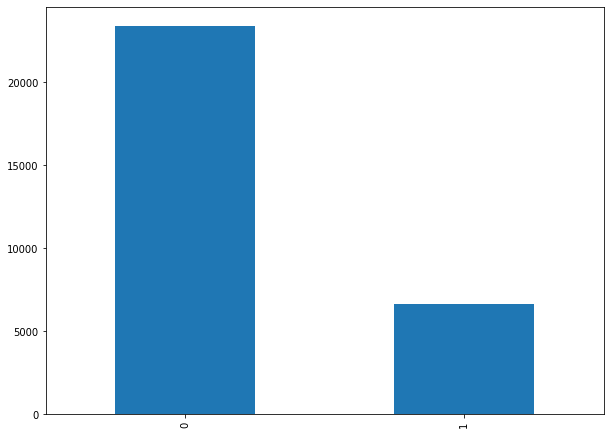

In [32]:
credit_cards_df["DEFAULT"].value_counts() \
    .plot.bar(figsize=(10.0, 7.5))

LIMIT_BAL       AxesSubplot(0.125,0.826831;0.352273x0.053169)
SEX          AxesSubplot(0.547727,0.826831;0.352273x0.053169)
EDUCATION       AxesSubplot(0.125,0.763028;0.352273x0.053169)
MARRIAGE     AxesSubplot(0.547727,0.763028;0.352273x0.053169)
AGE             AxesSubplot(0.125,0.699225;0.352273x0.053169)
PAY_1        AxesSubplot(0.547727,0.699225;0.352273x0.053169)
PAY_2           AxesSubplot(0.125,0.635423;0.352273x0.053169)
PAY_3        AxesSubplot(0.547727,0.635423;0.352273x0.053169)
PAY_4            AxesSubplot(0.125,0.57162;0.352273x0.053169)
PAY_5         AxesSubplot(0.547727,0.57162;0.352273x0.053169)
PAY_6           AxesSubplot(0.125,0.507817;0.352273x0.053169)
BILL_AMT1    AxesSubplot(0.547727,0.507817;0.352273x0.053169)
BILL_AMT2       AxesSubplot(0.125,0.444014;0.352273x0.053169)
BILL_AMT3    AxesSubplot(0.547727,0.444014;0.352273x0.053169)
BILL_AMT4       AxesSubplot(0.125,0.380211;0.352273x0.053169)
BILL_AMT5    AxesSubplot(0.547727,0.380211;0.352273x0.053169)
BILL_AMT

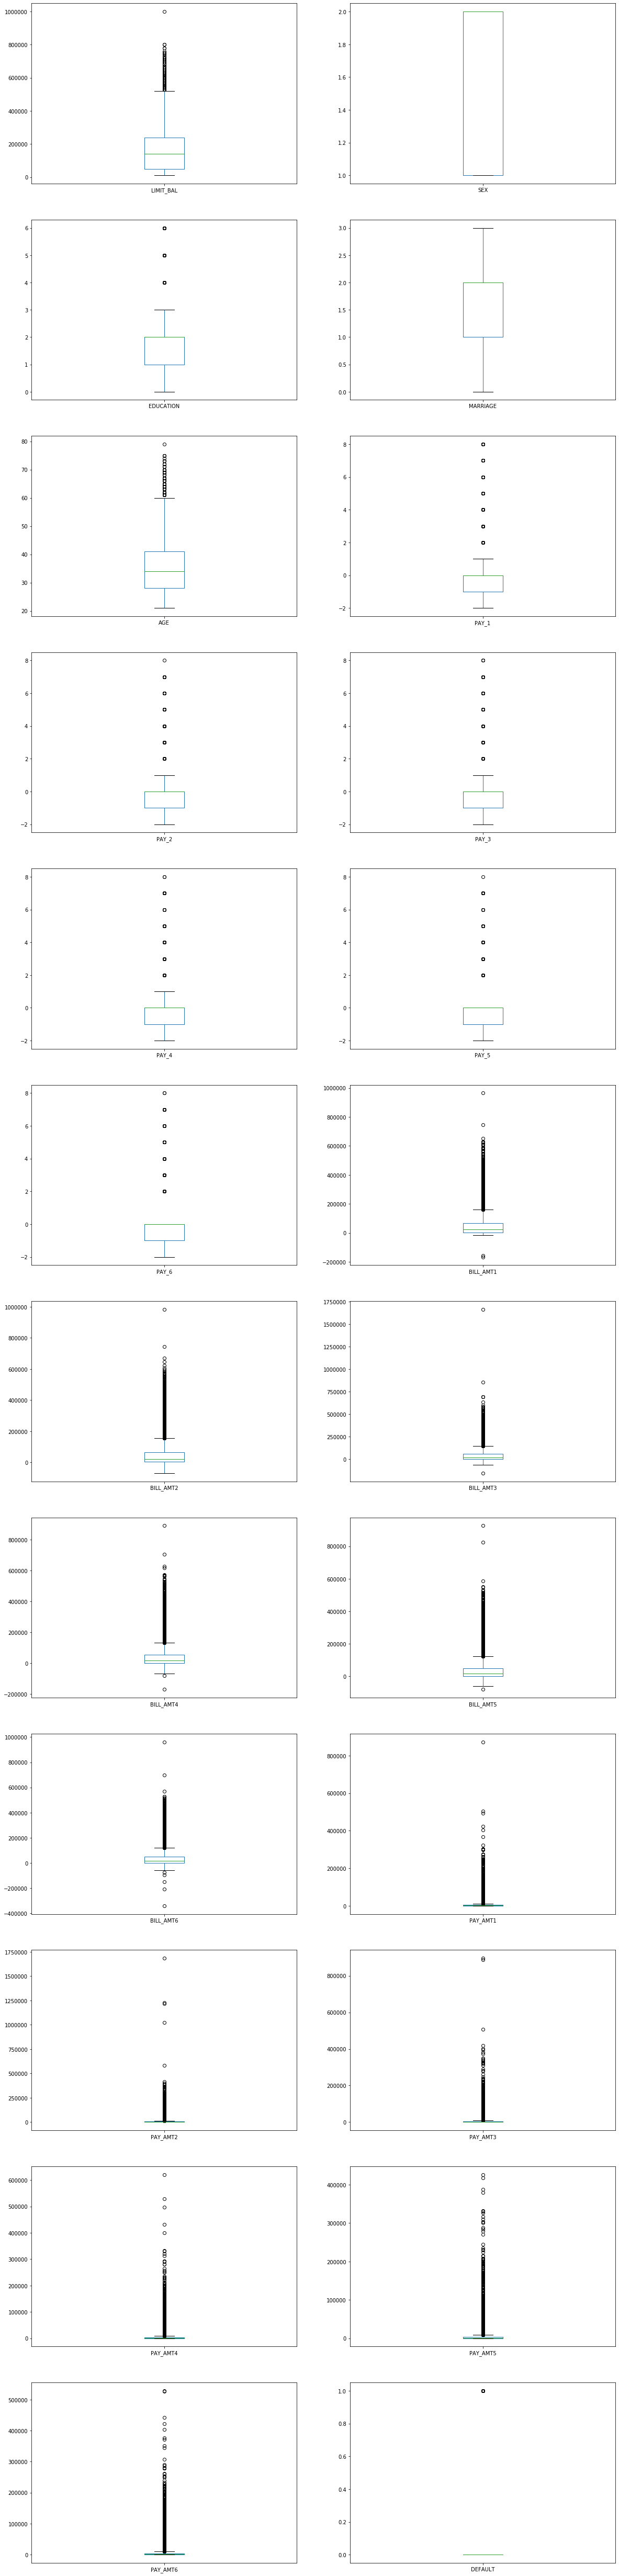

In [8]:
credit_cards_df.plot.box(layout=(12, 2), subplots=True,
                         sharex=False, sharey=False,
                         vert=True, figsize=(20.0, 90.0))

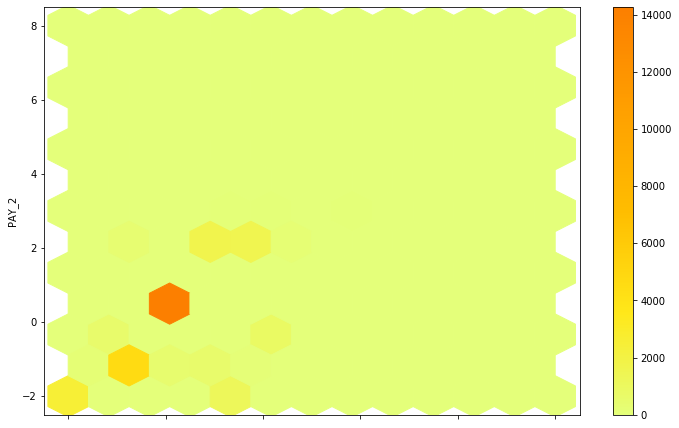

In [9]:
credit_cards_df.plot.hexbin(x="PAY_1", y="PAY_2", 
                            cmap="Wistia", 
                            figsize=(12.0, 7.5),
                            gridsize=12)

## Zmniejszenie wymiarowości danych

Skorzystamy z metody t-SNE do zmniejszenia wymiarowości danych i spróbujemy zwizualizować je na płaszczyźnie.

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2)

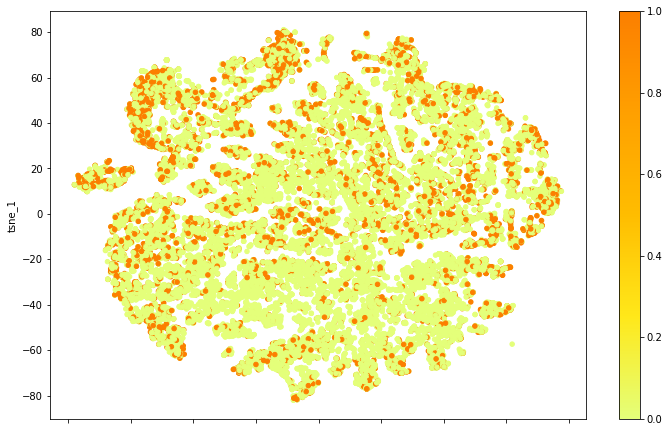

In [19]:
credit_cards_2d = tsne.fit_transform(
    credit_cards_df.drop(columns="DEFAULT")
)
credit_cards_2d_df = pd.DataFrame(credit_cards_2d, 
                                  columns=["tsne_0", "tsne_1"])
credit_cards_2d_df.plot.scatter(x="tsne_0", y="tsne_1", 
                                c=credit_cards_df["DEFAULT"], 
                                cmap="Wistia", 
                                figsize=(12.0, 7.5))

Wyniki nie są specjalnie obiecujące. Postarajmy się zatem wykorzystać drugą ze znanych nam metod i zobaczyć czy ona będzie w stanie wyraźniej odseparować poszczególne klasy.

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

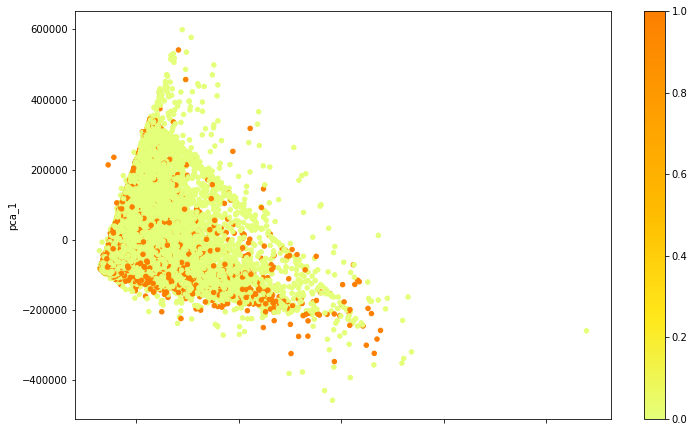

In [23]:
credit_cards_2d = pca.fit_transform(
    credit_cards_df.drop(columns="DEFAULT")
)
credit_cards_2d_df = pd.DataFrame(credit_cards_2d, 
                                  columns=["pca_0", "pca_1"])
credit_cards_2d_df.plot.scatter(x="pca_0", y="pca_1", 
                                c=credit_cards_df["DEFAULT"], 
                                cmap="Wistia", 
                                figsize=(12.0, 7.5))